# WHAT MAKES A COUNTRY HAPPY? 

In [3]:
## for data preprocessing
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [4]:
## for data visualization
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
## for predictive analysis

### Import data and check 

In [26]:
world_happiness_2022 = pd.read_csv('/Users/ellypham/Downloads/archive/2022.csv') # world happiness 2022
world_happiness_2021 = pd.read_csv('/Users/ellypham/Downloads/archive/2021.csv') # for 2021
world_happiness_2020 = pd.read_csv('/Users/ellypham/Downloads/archive/2020.csv') # for 2020
world_happiness_2019 = pd.read_csv('/Users/ellypham/Downloads/archive/2019.csv') # for 2019
world_happiness_2018 = pd.read_csv('/Users/ellypham/Downloads/archive/2018.csv') # for 2018
world_happiness_2017 = pd.read_csv('/Users/ellypham/Downloads/archive/2017.csv') # for 2017
world_happiness_2016 = pd.read_csv('/Users/ellypham/Downloads/archive/2016.csv') # for 2016
world_happiness_2015 = pd.read_csv('/Users/ellypham/Downloads/archive/2015.csv') # for 2015

In [26]:
world_happiness_2022.shape

(146, 12)

In [11]:
world_happiness_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [27]:
world_happiness_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


We are examining the world happiness 2022 data. This data set contains 146 rows, and 11 columns. 
There are 1 categorical field which is Country, and 11 numerical fields. These following factors 
are reported in the data sets that may influence the happiness ranking of a country. 
We can find the description of these factors:
    - GDP per capita: a reflection of such economic health into an individual citizen perspective
    - Social support: tangible and intangible resources that are available to one
    - Healthy life expectancy: the average number of years that one is expected to live in a good health 
    - Freedom to make life choices: the ability to decide or choose things without any contraints 
                                    from external parties
    - Generosity: how kind one to another
    - Perceptions of corruption: the levels of corruption by country


### Data Exploration and Preprocessing

##### Data Understanding

In [13]:
# Categorical field: 147 countries such as Finland, Denmark, Algeria, etc
pd.value_counts(world_happiness_2022['Country'])

Finland        1
Iran           1
Bangladesh     1
Laos           1
Algeria        1
              ..
Kuwait*        1
Hungary        1
Mauritius      1
Uzbekistan     1
Afghanistan    1
Name: Country, Length: 146, dtype: int64

In [10]:
# create a function to visualize numerical data in histogram
def plot_hist(n):
    """
    input : variable ex : "Ladder score"
    output : Hist plot  
    """
   
    plt.figure(figsize=(9,3))
    plt.hist(world_happiness_2022[n], color='pink')
    plt.xlabel(n)
    plt.ylabel("Frequency")
    plt.title("{} distribution with histogram ".format(n))
    plt.show()

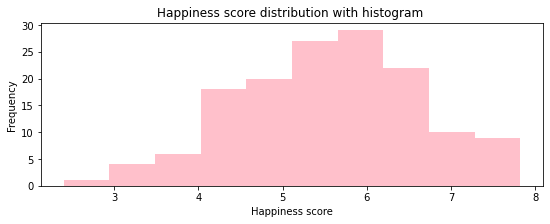

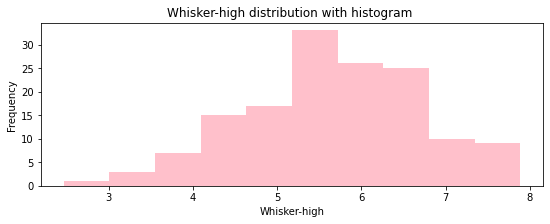

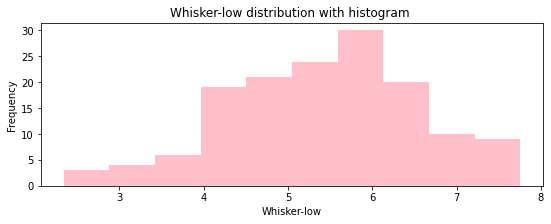

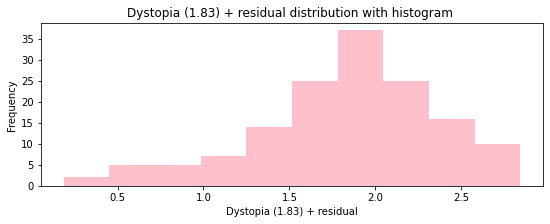

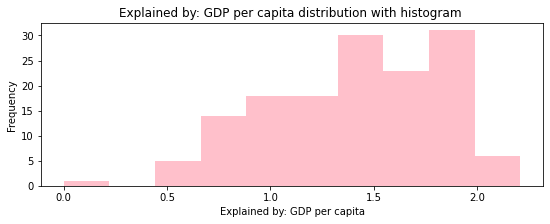

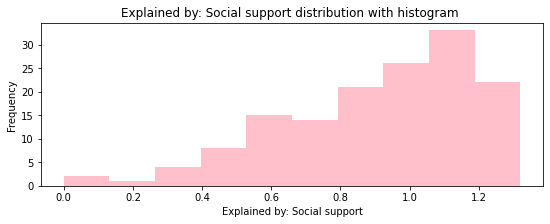

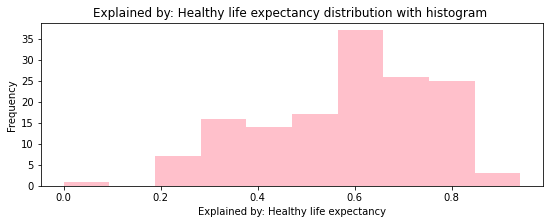

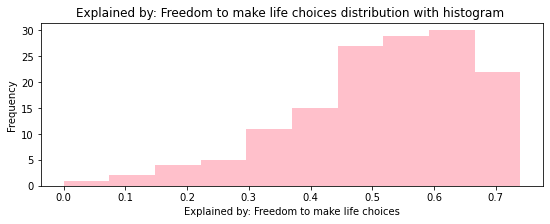

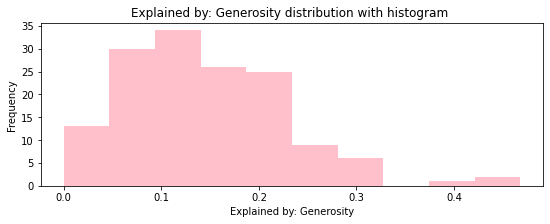

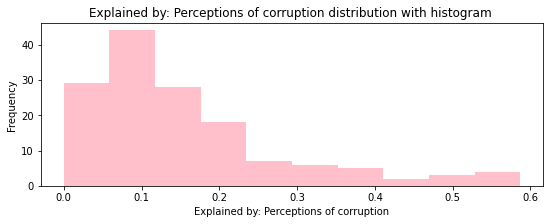

In [11]:
# pass the numerical fields in World Happiness 2022 to numericVar object 
numericVar = ["Happiness score","Whisker-high", "Whisker-low", "Dystopia (1.83) + residual",
             "Explained by: GDP per capita", "Explained by: Social support", 
              "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", 
              "Explained by: Generosity",  "Explained by: Perceptions of corruption"]

for n in numericVar:
        plot_hist(n)

In [25]:
world_happiness_2022.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


There are 146 countries and ranking from 1 to 146 in order based on their level of happiness
In happiness score, the score is from minimum of 2 to maximum of 7. Most of the countries received the average score of 5
In GDP per capita, we found outlier where it got 0. However, most of the countries are in the bucket of 1.5 to 2.0
In Social support, we also found some countries are in the the lower tail. However, a lot of the countries are having good social support programs as we see the histogram is left skewed
In Healthy life expectancy, looks like the majorities are having healthy life with a very few that are still struggling 
In Freedom to make life choices, the we can see the histogram is left skewed, meaning people are now with freedom to decide on their own course
In Generosity, we found outliers which are at the higher end. However, many countries are ranked from 0 to 0.2 which is at the lower
In Perceptions of corruption, the average score is 0.154781 which is way lower from the max score of 0.587


<AxesSubplot:>

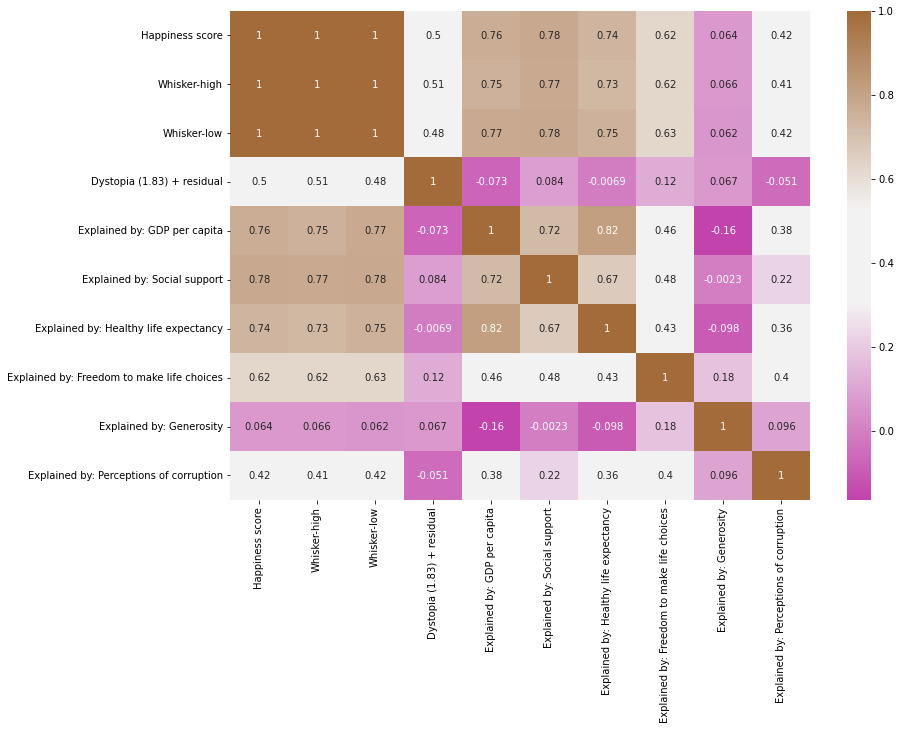

In [14]:
## The relationship of factors
cmap = sns.diverging_palette(320, 40, sep=50, as_cmap=True)
plt.figure(figsize=(13, 9))

sns.heatmap(world_happiness_2022[numericVar].corr(), annot=True, cmap=cmap)

Correlation:
Happiness score is highly correlated to GDP per capita, Social Support and Healthy life expectancy. Weak correlation to Generosity
GDP per captia is moderately correlated to Freedom to make life choices, and having weak correlation with Generosity
Healthy life expectancy is highly correlated to GDP per capita, and having weak correlation with Generosity
It is unexpected that Generosity is having weak correlation to GDP per capita, Social support and healthy life expectancy

##### Now, we check if there are any missing values

In [31]:
world_happiness_2022.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

No null values are found and ready for analysis

### Exploratory Data Analysis

In [16]:
## top 15 happiest countries
plotdata = world_happiness_2022[:15]
plotdata = plotdata[['Country', 'Explained by: GDP per capita', 'Explained by: Social support',
                   'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                   'Explained by: Generosity', 'Explained by: Perceptions of corruption']]
plotdata = plotdata.set_index('Country')
plotdata.head()

,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Country,,,,,,
Finland,1.892,1.258,0.775,0.736,0.109,0.534
Denmark,1.953,1.243,0.777,0.719,0.188,0.532
Iceland,1.936,1.320,0.803,0.718,0.270,0.191
Switzerland,2.026,1.226,0.822,0.677,0.147,0.461
Netherlands,1.945,1.206,0.787,0.651,0.271,0.419


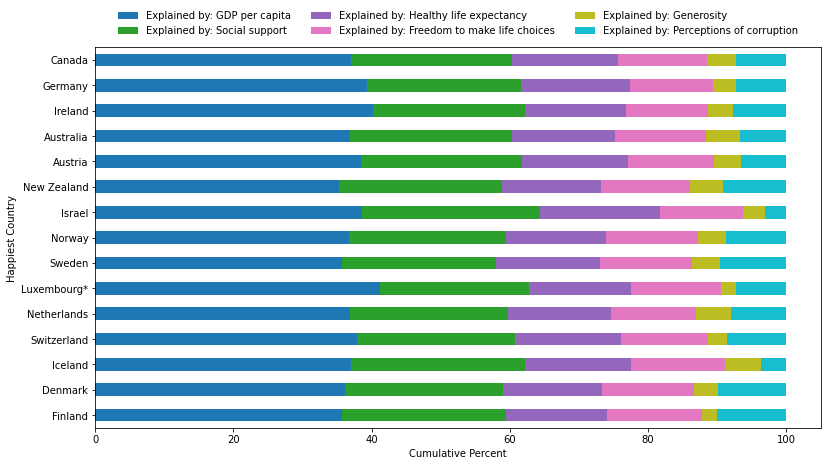

In [19]:
## plot the top 15 happiest contries in stacked bars
plotdata = plotdata.div(plotdata.sum(axis=1), axis=0) * 100
plotdata.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(13, 7))
plt.legend( bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3)
plt.ylabel('Happiest Country')
plt.xlabel('Cumulative Percent')
plt.show()

Comparing between the reported factors, we do not see much of changes over the countries.The proportion of these factors are almost the same in each country. It only appeards that Genrosity, Perceptions of corruption has a insignificant movement. Isarel, and Iceland have lower score in perceptions of corruption, whereas Finland, Denmark, and New Zealand seem to be a bit higher. 
For the Generosity, Iceland, Austria and Netherlands are with slightly higher score; whereas Findland, Luxembourg have lower higher score. 

In [21]:
## least 15 happiest countries
least_happiest_countries = world_happiness_2022.sort_values('Happiness score', ascending=True)
least_happiest_countries = least_happiest_countries[:15]
least_happiest_countries = least_happiest_countries[['Country', 'Explained by: GDP per capita', 'Explained by: Social support',
                   'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                   'Explained by: Generosity', 'Explained by: Perceptions of corruption']]
least_happiest_countries = least_happiest_countries.set_index('Country')
least_happiest_countries.head()

,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
Country,,,,,,
Afghanistan,0.758,0.000,0.289,0.000,0.089,0.005
Lebanon,1.392,0.498,0.631,0.103,0.082,0.034
Zimbabwe,0.947,0.690,0.270,0.329,0.106,0.105
Rwanda*,0.785,0.133,0.462,0.621,0.187,0.544
Botswana*,1.503,0.815,0.280,0.571,0.012,0.102


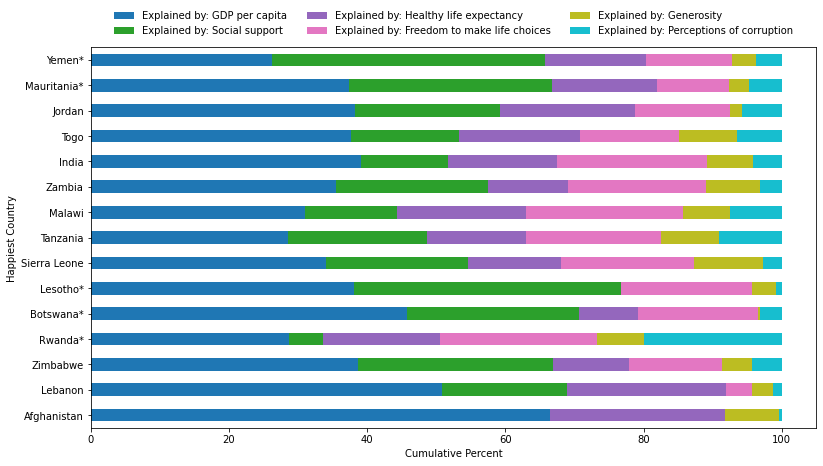

In [22]:
## plot the top 15 happiest contries in stacked bars
least_happiest_countries = least_happiest_countries.div(least_happiest_countries.sum(axis=1), axis=0) * 100
least_happiest_countries.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(13, 7))
plt.legend( bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3)
plt.ylabel('Happiest Country')
plt.xlabel('Cumulative Percent')
plt.show()

For the least 15 happinest countries, the proportion of the reported factors changes and is different accross these countries comparing to the top 15 happinest countries which we do not see much. Afghnistan has no social support and Rwanda is not having good social support programs. 

### Predictive Analysis

In [90]:
from sklearn.model_selection import train_test_split # for data splitting 
from sklearn.preprocessing import StandardScaler # for standardization

from sklearn.linear_model import LinearRegression, ElasticNet # for linear regression 
from sklearn.linear_model import Ridge # for ridge linear regresion
from sklearn.tree import DecisionTreeRegressor # for decision tree 
from sklearn.ensemble import RandomForestRegressor # for random forest

from sklearn import metrics # for model evaluation
from sklearn.metrics import mean_squared_error as MSE


In [70]:
# splitting data for testing and training (80/20)
X = world_happiness_2022[['Explained by: GDP per capita', 'Explained by: Social support',
                   'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                   'Explained by: Generosity', 'Explained by: Perceptions of corruption']] #only using numerical data

y = world_happiness_2022[['Happiness score']] 

# X = features, y = target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
# normalize the data using StandardScaler()
scale = StandardScaler()
normalized_data = scale.fit_transform(world_happiness_2022[numericVar])

In [96]:
# create Linear Regression algorithm for prediction
lm = LinearRegression()
lm.fit(X_train, y_train) # fitting 
print("The accuracy on training data is:", lm.score(X_train, y_train))

The accuracy on testing data is: 0.7933672974275474


In [74]:
lm.coef_

array([[0.4841787 , 1.25991296, 1.38370187, 1.36141428, 0.8744462 ,
        1.46389845]])

In [92]:
# accuracy on testing data
print("The accuracy on testing data is:",lm.score(X_test,y_test))

The accuracy on training data is: 0.6714180707791706


In [91]:
# ridge regression
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train,y_train)
print('Ridge score: ',ridge.score(X_test,y_test))

Ridge score:  0.6647311009100546


In [82]:
# decision tree model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [102]:
# prediction using decision tree model
print("The accuracy on testing data is ",dt.score(X_test,y_test))

The accuracy on testing data is  0.5264677984547452


In [103]:
# random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
print("The accuracy on testing data is ",rf.score(X_test,y_test))

The accuracy on testing data is  0.6932923647766669
